In [1]:
import os
import re
from pathlib import Path

import numpy as np
from PIL import Image

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [91]:
from violet.utils.dataloaders import listfiles, MultichannelImageDataset, multichannel_image_dataloader, DataAugmentationDINOMultichannel

In [92]:
img_dir = '/home/estorrs/violet/data/codex/tile_test_panc_07062021_256res'

In [100]:
dataloader = multichannel_image_dataloader(img_dir, shuffle=True, pad=False)

In [94]:
dataloader.dataset.samples, dataloader.dataset.channels

(array(['hu_pancreas_TrisEDTA_0_0', 'hu_pancreas_TrisEDTA_0_10',
        'hu_pancreas_TrisEDTA_0_12', ..., 'hu_pancreas_TrisEDTA_9_16',
        'hu_pancreas_TrisEDTA_9_19', 'hu_pancreas_TrisEDTA_9_35'],
       dtype='<U26'),
 ['CD107a',
  'CD11c',
  'CD20',
  'CD21',
  'CD31',
  'CD3e',
  'CD4',
  'CD44',
  'CD45',
  'CD45RO',
  'CD68',
  'CD8',
  'DAPI',
  'HLADR',
  'Ki67',
  'Mac2',
  'actin',
  'ecadherin',
  'pancytok'])

In [95]:
[dataloader.dataset.channels.index(c) for c in ['DAPI', 'Ki67', 'CD20', 'CD8', 'pancytok']]

[12, 14, 2, 11, 18]

In [96]:
import seaborn as sns
from einops import rearrange
def create_pseudocolor_image(img, channels, colors=None):
    if colors is None:
        colors = sns.color_palette()
    
    new = np.zeros((img.shape[0], img.shape[1], 3))
    for i, c in enumerate(channels):
        new += np.repeat(np.expand_dims(img[:, :, c], axis=-1), 3, axis=-1) * np.asarray(colors[i])
    
    new = (new / np.max(new)) * 255.
    return new.astype(np.uint8)

    

In [101]:
b = next(iter(dataloader))
b.shape

torch.Size([64, 19, 224, 224])

0


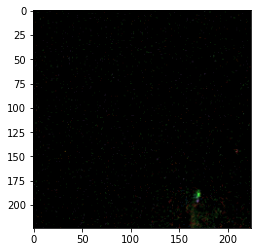

1


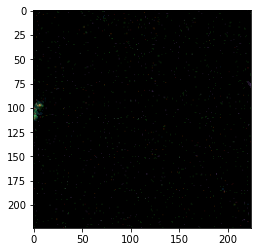

2


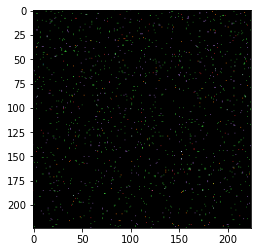

3


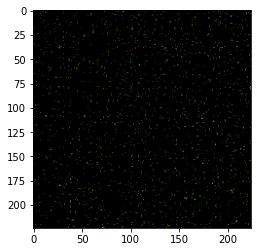

4


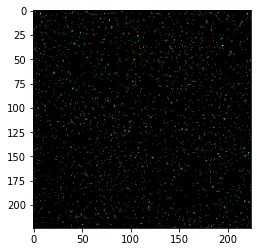

5


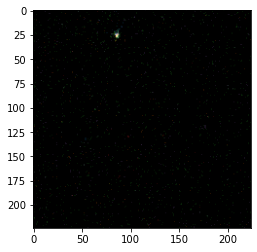

6


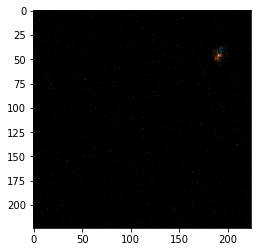

7


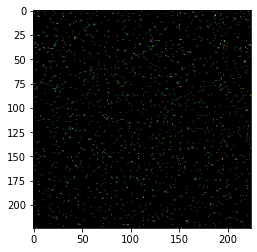

8


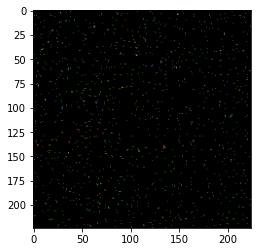

9


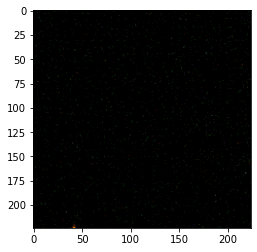

10


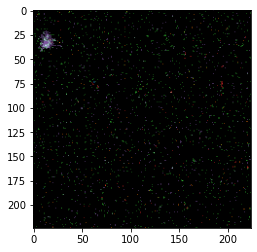

11


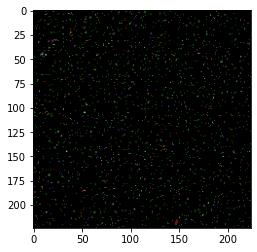

12


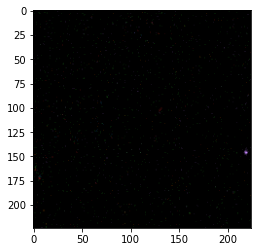

13


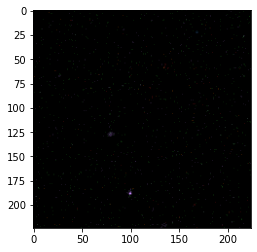

14


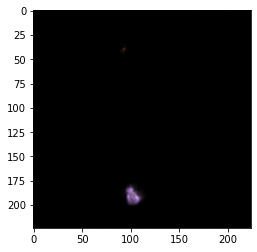

15


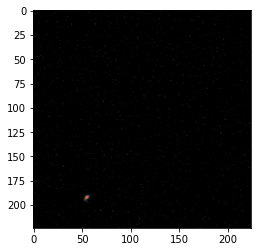

16


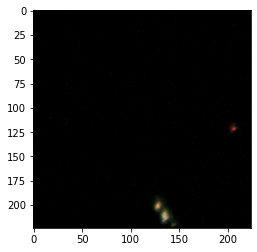

17


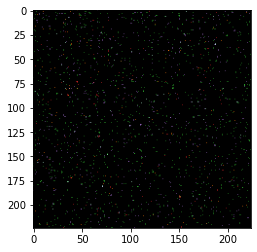

18


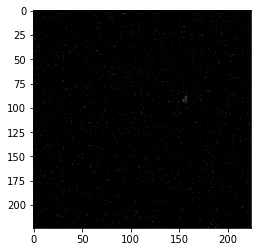

19


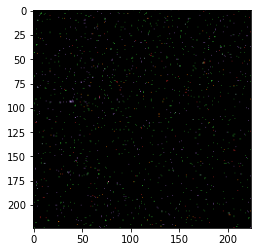

20


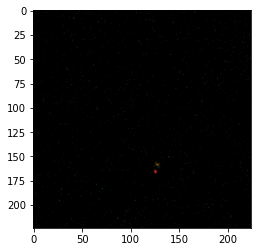

21


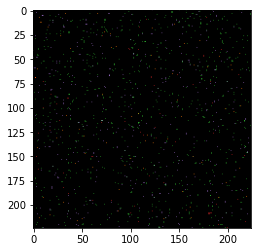

22


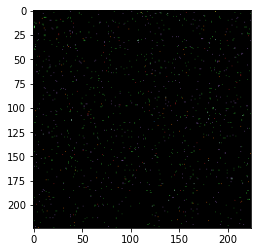

23


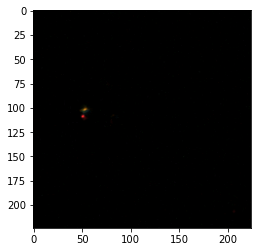

24


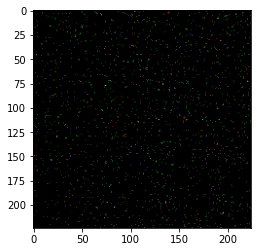

25


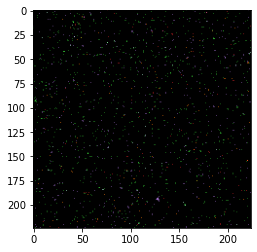

26


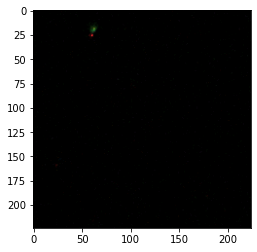

27


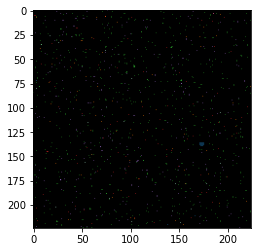

28


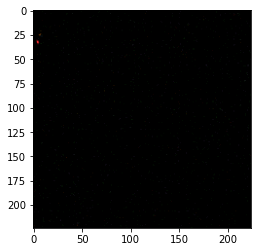

29


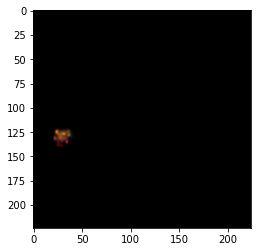

30


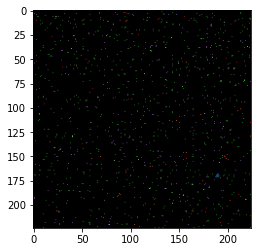

31


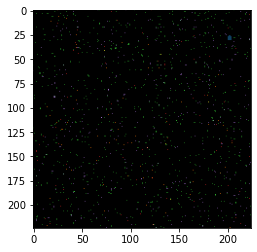

32


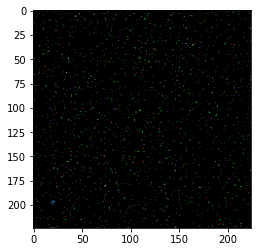

33


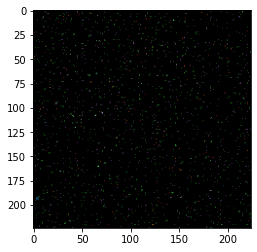

34


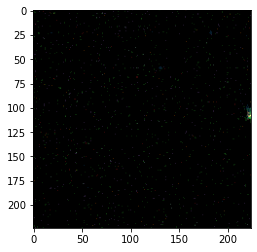

35


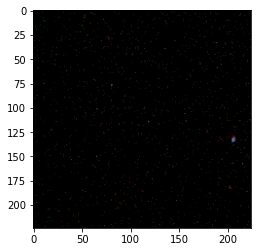

36


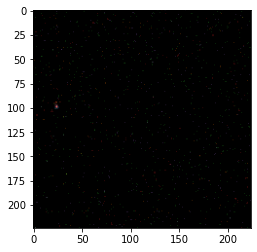

37


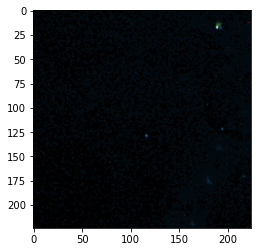

38


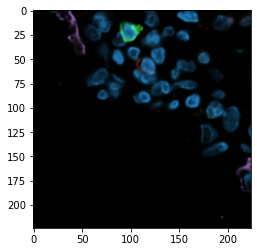

39


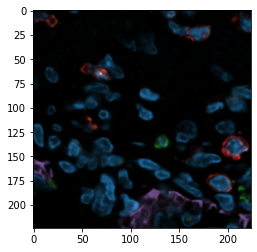

40


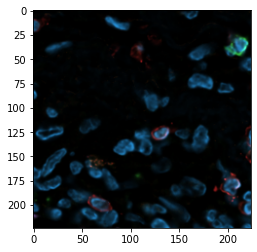

41


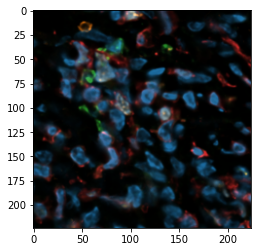

42


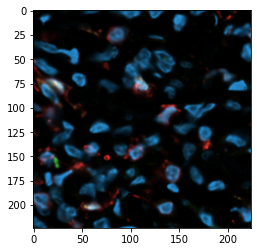

43


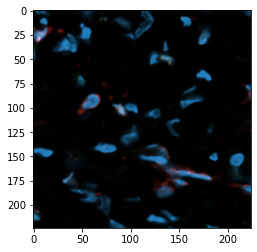

44


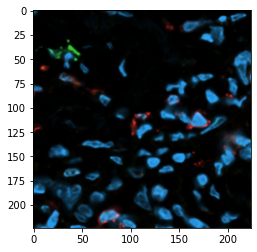

45


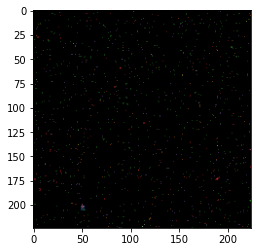

46


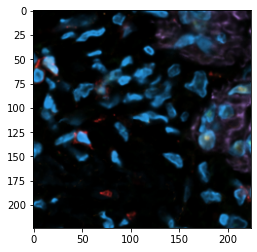

47


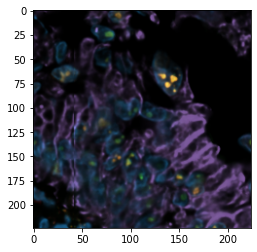

48


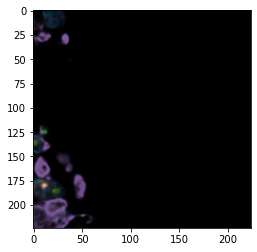

49


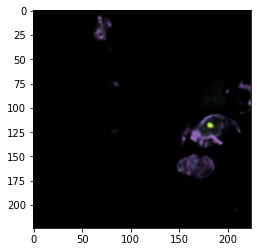

50


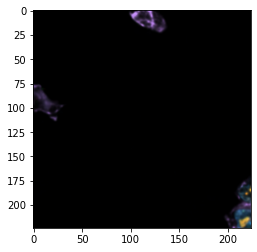

51


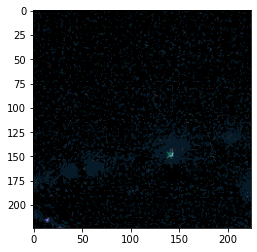

52


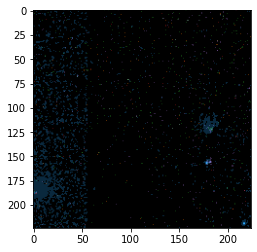

53


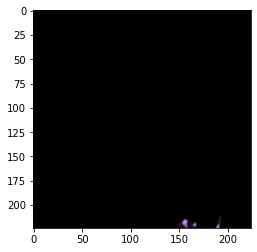

54


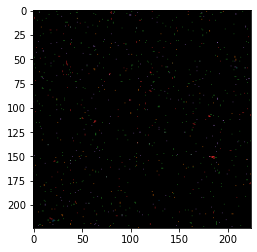

55


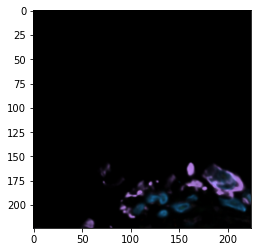

56


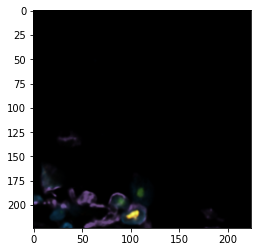

57


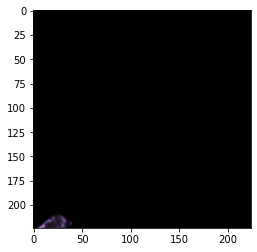

58


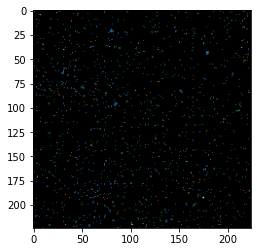

59


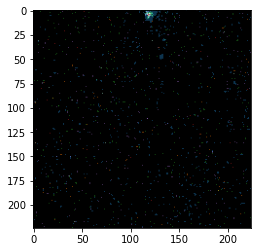

60


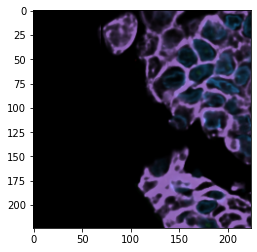

61


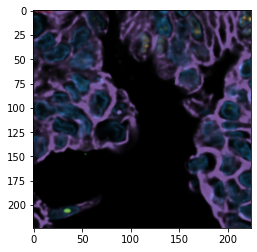

62


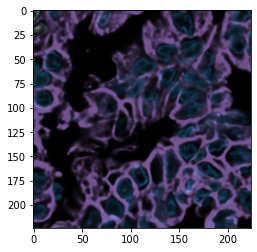

63


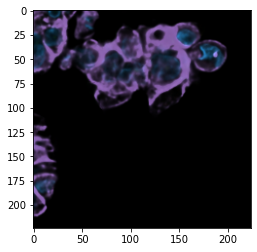

In [63]:
for i, x in enumerate(b):
    print(i)
    x = rearrange(x, 'c h w -> h w c').numpy()
    pseudo = create_pseudocolor_image(x, [12, 14, 2, 11, 18])
    plt.imshow(pseudo)
    plt.show()

In [64]:
test = b[39]

In [84]:
transform = DataAugmentationDINOMultichannel((0.4, 1.), (0.05, 0.4), 8)

In [85]:
new = transform(test)

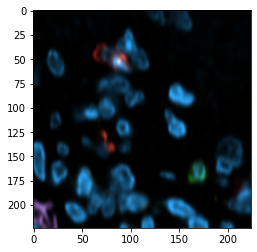

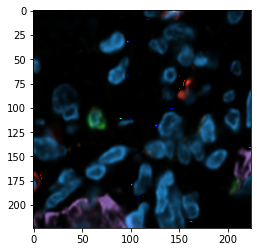

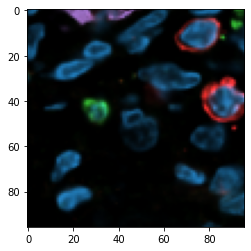

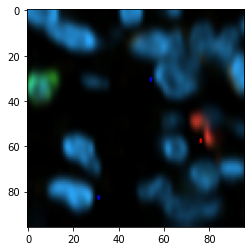

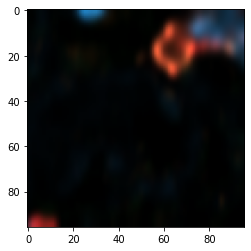

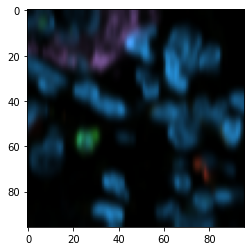

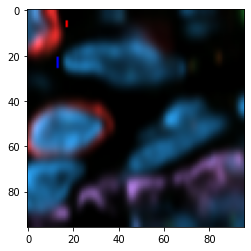

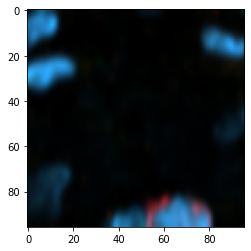

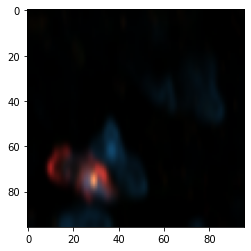

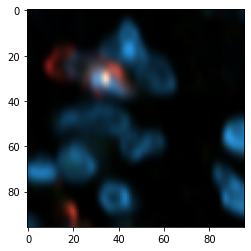

In [90]:
for x in new:
    x = rearrange(x, 'c h w -> h w c').numpy()
    pseudo = create_pseudocolor_image(x, [12, 14, 2, 11, 18])
    plt.imshow(pseudo)
    plt.show()

In [112]:
transform = DataAugmentationDINOMultichannel(
        (0.4, 1.), (0.05, 0.4), 8
)
dataset = MultichannelImageDataset(
    img_dir, transform=transform, pad=False)

/home/estorrs/miniconda3/envs/violet/lib/python3.8/site-packages/torchvision/transforms/transforms.py:803: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
/home/estorrs/miniconda3/envs/violet/lib/python3.8/site-packages/torchvision/transforms/transforms.py:257: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [114]:
import torch
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=64,
    shuffle=True,
    drop_last=True,
)

In [115]:
b = next(iter(dataloader))
len(b)

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


10

In [116]:
b[0].shape

torch.Size([64, 19, 224, 224])